In [1]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# read and Conconate the csv's
df_3 = pd.read_csv('smiles.csv')


# proof and make a list of SMILES
df_smiles = df_3['smiles']
c_smiles = []
for ds in df_smiles:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()

# make a list of mols
ms = [Chem.MolFromSmiles(x) for x in c_smiles]

# make a list of fingerprints (fp)
fps = [FingerprintMols.FingerprintMol(x) for x in ms]

# the list for the dataframe
qu, ta, sim = [], [], []

# compare all fp pairwise without duplicates
for n in range(len(fps)-1): # -1 so the last fp will not be used
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps[n+1:]) # +1 compare with the next to the last fp
    print(c_smiles[n], c_smiles[n+1:]) # witch mol is compared with what group
    # collect the SMILES and values
    for m in range(len(s)):
        qu.append(c_smiles[n])
        ta.append(c_smiles[n+1:][m])
        sim.append(s[m])
print()

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'Similarity':sim}
df_final = pd.DataFrame(data=d)
df_final = df_final.sort_values('Similarity', ascending=False)
print(df_final)

# save as csv
df_final.to_csv('third.csv', index=False, sep=',')


CCOCC ['CCCO', 'CCCCO']
CCCO ['CCCCO']

   query target  Similarity
2   CCCO  CCCCO    0.769231
0  CCOCC   CCCO    0.466667
1  CCOCC  CCCCO    0.388889


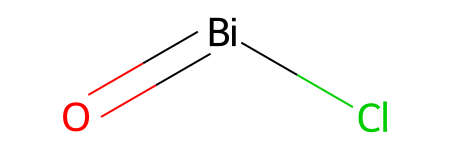

In [4]:
from rdkit import Chem

Chem.MolFromSmiles('Cl[Bi]=O')

In [7]:
import plotly.express as px
import pandas as pd

# Create a sample DataFrame
data = {'x': [1, 2, 3, 4],
        'y': [10, 11, 12, 13],
        'color_column': ['red', 'green', 'blue', 'yellow']}

df = pd.DataFrame(data)

# Plot the scatter plot with colors matching the values
fig = px.scatter(df, x='x', y='y', color='color_column', color_discrete_sequence=df['color_column'].unique())

# Show the plot
fig.show()